
# Individual Project 
----------
#### Task:

This dataset is composed of 1100 samples with 30 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of Logistic
Regression (implemented by sklearn.linear_model.LogisticRegression) with that of
a Random Forest (implemented by sklearn.ensemble.RandomForestClassifier). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

#### Outline:
1. Exploratory Data Analysis (EDA)
2. Data Visualization
3. Clustering
4. Supervised Learning
    * Logistic Regression
    * Random Forest
5. Model Selection
6. *Bonus*: MLP and Ensemble Learning
7. Testing
8. Conclusions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import umap.umap_ as umap
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, ConfusionMatrixDisplay, recall_score, precision_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import shapiro, ttest_ind
from sklearn.tree import plot_tree




np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv('/Users/filipporonzino/mathematical-modelling-in-ml/mathematical-modelling-in-ml/data/mldata_0003191788.csv')

In [5]:
df

Unnamed: 0  label  feature_1  feature_2  feature_3  feature_4  \
0              0      1   0.186841  -2.744690  -0.116704  -0.602364   
1              1      0  -0.140899  -0.940808   0.319645   3.037467   
2              2      1  -1.173064  -0.114253   0.841768   1.291894   
3              3      0   0.295393   3.583453  -0.586350  -0.377401   
4              4      0  -0.157495  -3.544878  -3.704118  -3.914768   
...          ...    ...        ...        ...        ...        ...   
1095        1095      1  -1.248654  -2.638169  -0.341790  -3.235112   
1096        1096      0   1.306852  -2.095241  -1.794960  -1.595448   
1097        1097      1  -0.101527  -0.282872   2.278711   4.529451   
1098        1098      1  -1.701515  -3.018610   0.706628   4.117148   
1099        1099      0   2.330523   2.547265   0.112298   1.698835   

      feature_5  feature_6  feature_7  feature_8  ...  feature_21  feature_22  \
0     -1.641072   2.313851   0.170587   1.125775  ...   -6.373998    0.709352   
1      2.500847   2.470812   0.185487   2.616694  ...   -0.923659   -2.015370   
2      2.255292  -1.211251   0.155832  -0.713129  ...    2.020354   -0.996525   
3      3.123070  -1.129148   0.035295   0.739957  ...   -5.041228    1.271944   
4      3.285951   2.204027   0.173815   0.587712  ...    3.347483   -1.518625   
...         ...        ...        ...        ...  ...         ...         ...   
1095  -1.061706   5.592094   0.768235   0.865910  ...    0.781173   -1.556207   
1096   0.752237   1.084699   0.872910   0.119845  ...    1.800205   -0.674627   
1097   0.636032  -3.292582   0.637552  -0.666807  ...   -0.200464   -2.097702   
1098   5.242728   2.188487   1.027309   0.093118  ...   -2.350287    5.330351   
1099   0.906026   1.842621  -0.386566   1.450630  ...    0.003601    1.957292   

      feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0      -0.058280   -0.247173    0.380575    6.038908    2.977625   -0.110516   
1       1.692468    0.724315    0.978863    0.703763   -0.800900    0.101999   
2      -0.370041    0.430683   -0.660852   -2.146161    0.250038   -1.456109   
3       0.386650    0.063930    0.819503   -1.709886    0.893065   -0.453312   
4      -1.176892    0.661577    0.152321   -0.822095    0.775936    1.406577   
...          ...         ...         ...         ...         ...         ...   
1095    0.394023   -0.697240   -0.029789   -0.646155   -0.572358    0.416792   
1096   -1.272363    0.310472    0.912195   -0.013783    0.583534    0.490962   
1097   -0.038374    0.367508   -1.253793   -0.960783    0.616830    0.984960   
1098   -0.560883   -0.806675    0.290558    0.496878    0.461117    0.345153   
1099    0.114508    0.676324    0.402528    2.611261   -1.412009   -0.666795   

      feature_29  feature_30  
0       7.712829   -0.883559  
1       0.614388    2.586955  
2      -2.890239   -1.718367  
3       0.155210   -4.222819  
4       3.439471   -4.224369  
...          ...         ...  
1095   -4.918894    0.274711  
1096    2.843907   -3.774760  
1097   -1.101286   -1.065255  
1098    0.100160    0.769789  
1099    1.655885   -1.312340  

[1100 rows x 32 columns]

It is clear that the dataset is composed of 1100 samples with 30 features each. Let us inspect if the column Unnamed: 0 is the sample id and, if so, if we can drop it.

In [6]:
print("Number of unique elements in the ID column:", len(df["Unnamed: 0"].unique()))
print("Missing values in ID column:", df["Unnamed: 0"].isna().sum())

Number of unique elements in the ID column: 1100
Missing values in ID column: 0


Hence we do not have any problem in deleting the first column.

In [7]:
df = df.drop(columns=["Unnamed: 0"])
df

label  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         1   0.186841  -2.744690  -0.116704  -0.602364  -1.641072   2.313851   
1         0  -0.140899  -0.940808   0.319645   3.037467   2.500847   2.470812   
2         1  -1.173064  -0.114253   0.841768   1.291894   2.255292  -1.211251   
3         0   0.295393   3.583453  -0.586350  -0.377401   3.123070  -1.129148   
4         0  -0.157495  -3.544878  -3.704118  -3.914768   3.285951   2.204027   
...     ...        ...        ...        ...        ...        ...        ...   
1095      1  -1.248654  -2.638169  -0.341790  -3.235112  -1.061706   5.592094   
1096      0   1.306852  -2.095241  -1.794960  -1.595448   0.752237   1.084699   
1097      1  -0.101527  -0.282872   2.278711   4.529451   0.636032  -3.292582   
1098      1  -1.701515  -3.018610   0.706628   4.117148   5.242728   2.188487   
1099      0   2.330523   2.547265   0.112298   1.698835   0.906026   1.842621   

      feature_7  feature_8  feature_9  ...  feature_21  feature_22  \
0      0.170587   1.125775 -15.196770  ...   -6.373998    0.709352   
1      0.185487   2.616694  -2.061065  ...   -0.923659   -2.015370   
2      0.155832  -0.713129   8.216570  ...    2.020354   -0.996525   
3      0.035295   0.739957  -0.644795  ...   -5.041228    1.271944   
4      0.173815   0.587712  -7.450599  ...    3.347483   -1.518625   
...         ...        ...        ...  ...         ...         ...   
1095   0.768235   0.865910  -5.357165  ...    0.781173   -1.556207   
1096   0.872910   0.119845  -8.449998  ...    1.800205   -0.674627   
1097   0.637552  -0.666807   8.033673  ...   -0.200464   -2.097702   
1098   1.027309   0.093118   2.060452  ...   -2.350287    5.330351   
1099  -0.386566   1.450630  -6.762068  ...    0.003601    1.957292   

      feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0      -0.058280   -0.247173    0.380575    6.038908    2.977625   -0.110516   
1       1.692468    0.724315    0.978863    0.703763   -0.800900    0.101999   
2      -0.370041    0.430683   -0.660852   -2.146161    0.250038   -1.456109   
3       0.386650    0.063930    0.819503   -1.709886    0.893065   -0.453312   
4      -1.176892    0.661577    0.152321   -0.822095    0.775936    1.406577   
...          ...         ...         ...         ...         ...         ...   
1095    0.394023   -0.697240   -0.029789   -0.646155   -0.572358    0.416792   
1096   -1.272363    0.310472    0.912195   -0.013783    0.583534    0.490962   
1097   -0.038374    0.367508   -1.253793   -0.960783    0.616830    0.984960   
1098   -0.560883   -0.806675    0.290558    0.496878    0.461117    0.345153   
1099    0.114508    0.676324    0.402528    2.611261   -1.412009   -0.666795   

      feature_29  feature_30  
0       7.712829   -0.883559  
1       0.614388    2.586955  
2      -2.890239   -1.718367  
3       0.155210   -4.222819  
4       3.439471   -4.224369  
...          ...         ...  
1095   -4.918894    0.274711  
1096    2.843907   -3.774760  
1097   -1.101286   -1.065255  
1098    0.100160    0.769789  
1099    1.655885   -1.312340  

[1100 rows x 31 columns]

We quickly inspect the data types and any missing values in the dataset.

In [8]:
print("Data types of the columns:", df.dtypes.value_counts())
print("Number of missing values in the dataset:", df.isna().sum().sum())

Data types of the columns: float64    30
int64       1
Name: count, dtype: int64
Number of missing values in the dataset: 0


Great! All values of features are numeric and moreover we do not have missing values.

Now let us inspect the labels, we expect to have 2 possible values as stated in the assignment.

In [9]:
df["label"].unique()

array([1, 0])

Let us see if they are balanced.

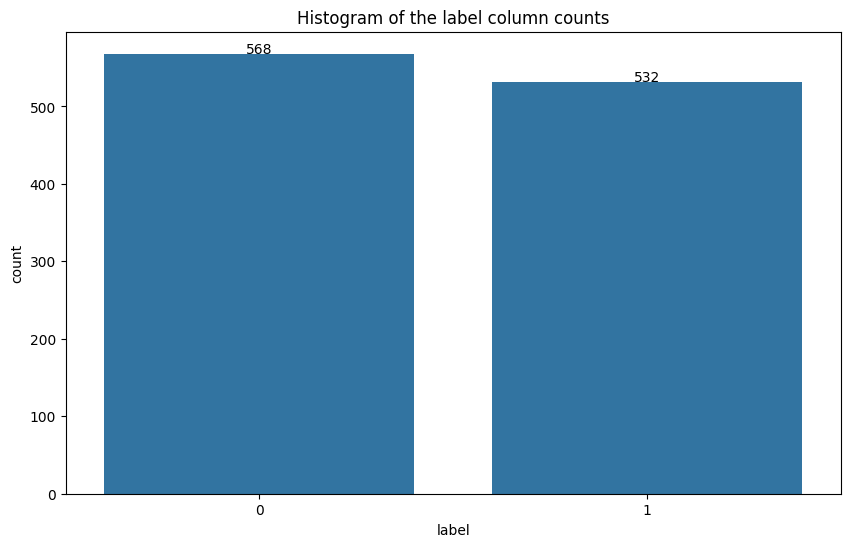

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=df)
plt.title("Histogram of the label column counts")
for i in range(len(df["label"].unique())):
    plt.text(i, df["label"].value_counts().values[i], df["label"].value_counts().values[i], ha = 'center')
plt.show()

The labels are balanced, which is good for the classification task. Now let us inspect the features instead.

In [11]:
df_features = df.drop(columns=["label"])
df_features.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      0.060647    -0.366158     1.200502    -0.462171     0.538262   
std       1.004725     2.499004     2.352068     2.500206     2.269113   
min      -3.198872    -7.797190    -6.391251    -8.485804    -6.759114   
25%      -0.602991    -2.055746    -0.379523    -2.121274    -0.972832   
50%       0.030977    -0.507137     1.204412    -0.519821     0.489950   
75%       0.735890     1.246236     2.757944     1.241079     1.970690   
max       3.331658     8.031976     8.863005     8.424175     8.239746   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000  ...   
mean      1.049753     0.095785     0.136334    -1.916849     0.046056  ...   
std       2.061337     0.973378     0.995805     5.775382     0.983710  ...   
min      -6.385449    -3.134674    -2.998161   -20.359685    -3.493763  ...   
25%      -0.282908    -0.558524    -0.517616    -5.965297    -0.610249  ...   
50%       1.035311     0.066979     0.103702    -1.838725     0.029674  ...   
75%       2.324991     0.754281     0.816023     1.865396     0.708567  ...   
max       9.618153     3.865937     3.487003    18.690860     3.454902  ...   

        feature_21   feature_22   feature_23   feature_24   feature_25  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean      0.066003    -0.473698     0.054317     0.120844     0.082652   
std       2.574681     2.178810     0.947827     1.001644     1.036514   
min      -8.186496    -7.355286    -2.971199    -3.096381    -3.016178   
25%      -1.587301    -1.907630    -0.579704    -0.571916    -0.591526   
50%       0.140228    -0.609788     0.029868     0.095667     0.095901   
75%       2.012621     0.915316     0.679729     0.792304     0.783633   
max       7.538498     7.355394     2.833630     3.672508     3.464763   

        feature_26   feature_27   feature_28   feature_29   feature_30  
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000  
mean     -0.420596     0.155161     0.142598     0.633804     0.203087  
std       2.405899     0.983242     0.991322     2.364771     2.909591  
min      -7.246709    -3.233028    -2.939875    -7.126700    -9.279328  
25%      -2.053991    -0.476474    -0.525719    -0.918847    -1.723850  
50%      -0.497600     0.135359     0.136409     0.715291     0.232109  
75%       1.140728     0.853275     0.780351     2.234327     2.173947  
max      10.017235     2.977625     3.754797     9.229670    10.465231  

[8 rows x 30 columns]

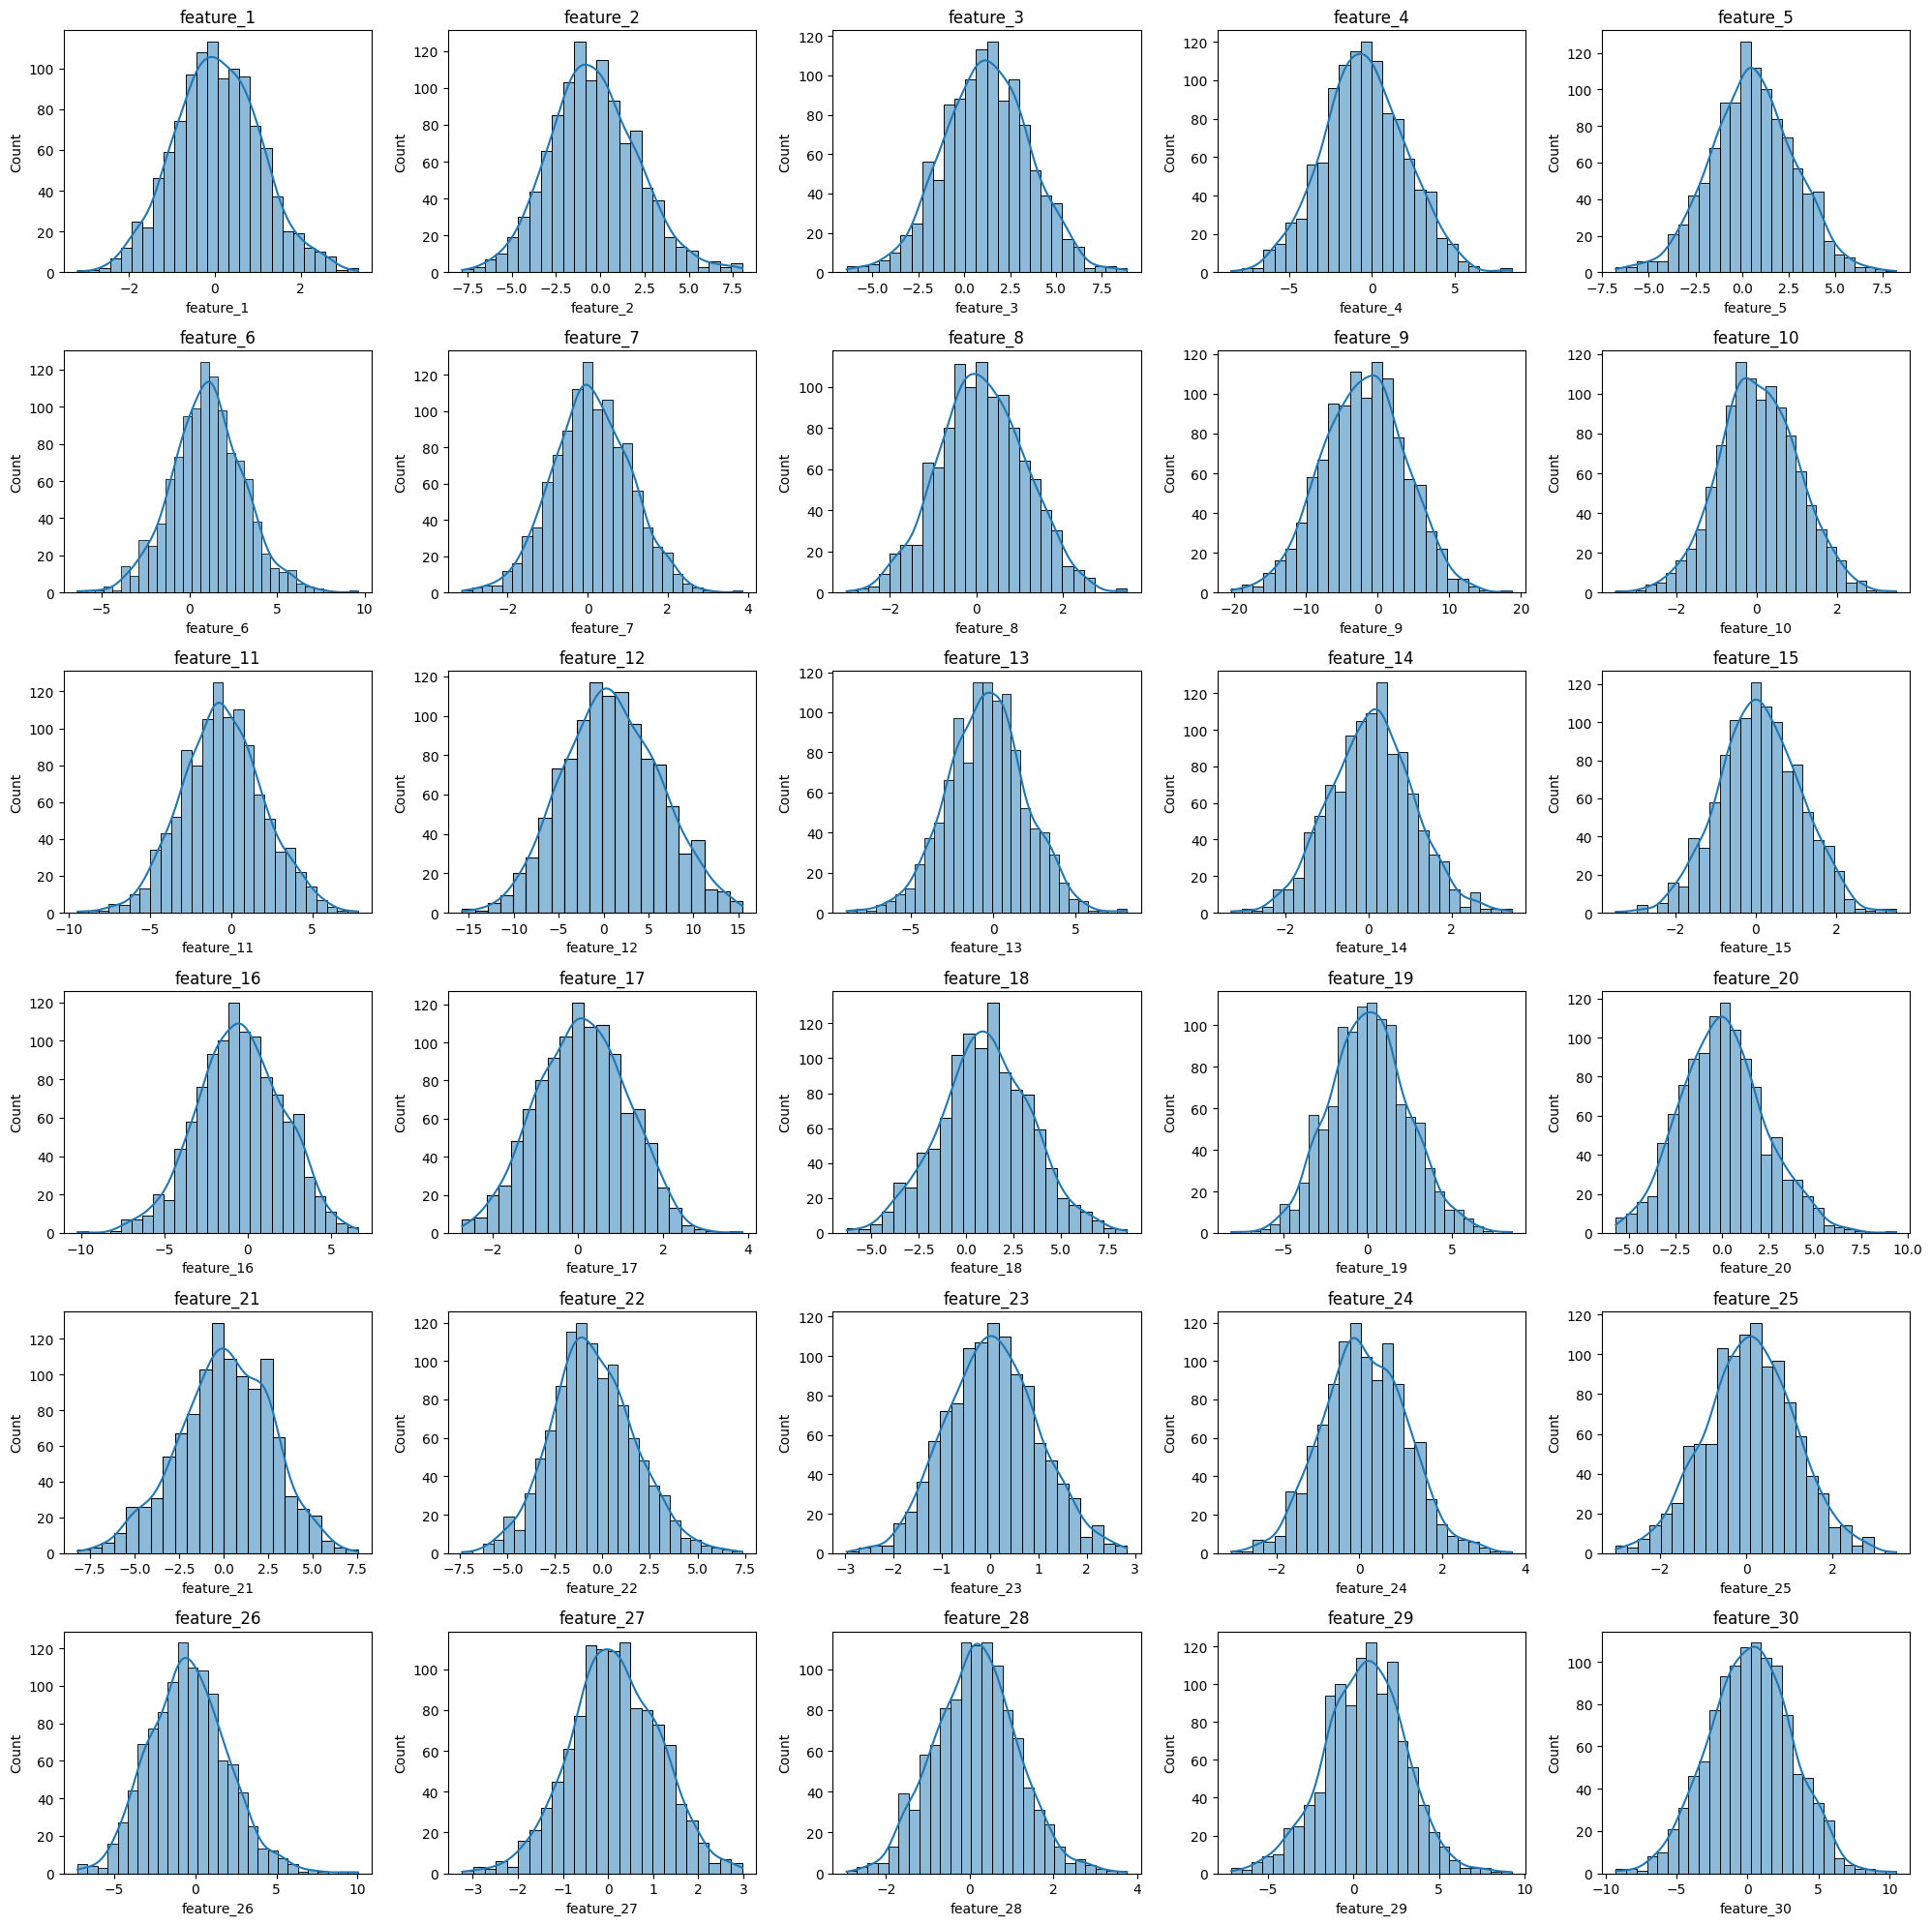

In [12]:
# Plot the distribution of the features
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_features.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_features[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Plots clearly shows that the features are normally distributed. First let's have a look at kurtosis and skewnees and then proceed in proving normality statistically with the Shapiro-Wilk test; we use it instead of Kolmogorov-Smirnov test because it is more powerful given the small sample size not too large.

In details, Shapiro-Wilk test works as follows:
- $H_0$ Null Hypothesis: the data is normally distributed
- $H_1$ Alternative Hypothesis: the data is not normally distributed

The p-value associated with the test helps to decide whether to reject the null hypothesis:
- if p-value < 0.05, reject $H_0$ and so the data is not normally distributed
- if p-value > 0.05, do not reject $H_0$ and so there is no evidence that the data is not normally distributed

So we see that in the case in which the p.value is greater than 0.05, we cannot surely say that the data is normally distributed, but we can say that there is no evidence that it is not.

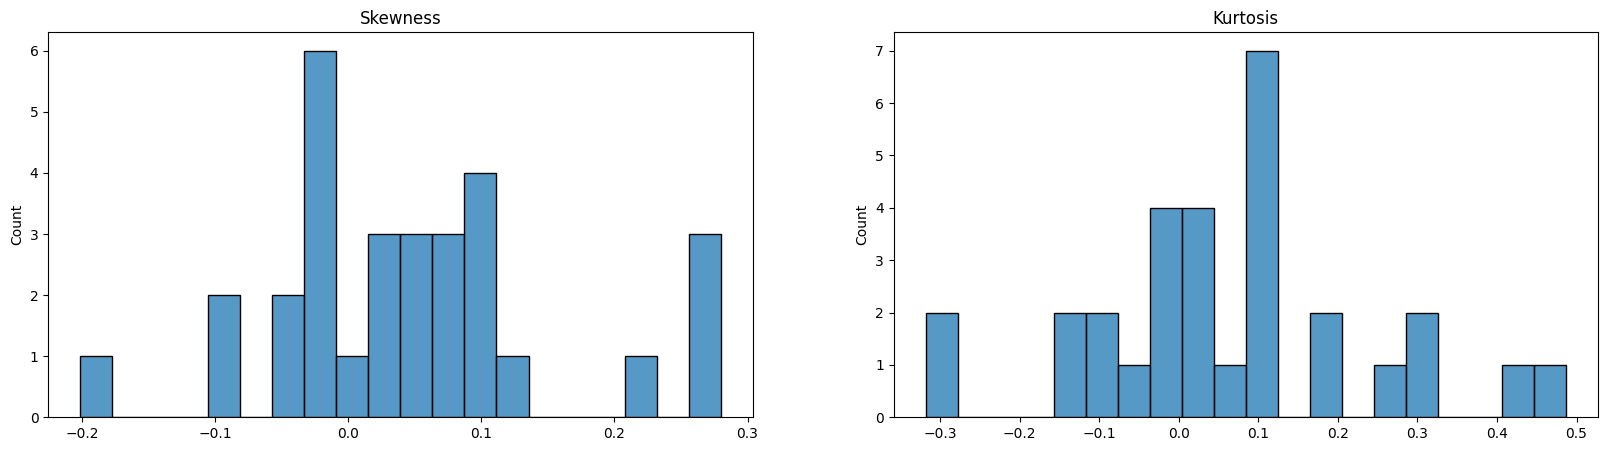

Mean Skewness values of the features: 0.044878070450145996
Mean Kurtosis values of the features: 0.06280013016230952


In [13]:
skewness = df_features.skew()
kurtosis = df_features.kurtosis()
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(skewness, bins=20)
plt.title("Skewness")
plt.subplot(1, 2, 2)
sns.histplot(kurtosis, bins=20)
plt.title("Kurtosis")
plt.show()

# print the skewness and kurtosis values
print("Mean Skewness values of the features:", skewness.mean())
print("Mean Kurtosis values of the features:", kurtosis.mean())

In [14]:
# Prove normality of the features with shapiro test
non_normal_count = 0
for column in df_features.columns:
    p_value = shapiro(df_features[column])[1]
    if p_value < 0.05:
        non_normal_count += 1
if df_features.shape[1] == non_normal_count:
    print("All features have non-normal distribution")
else:
    print("Not all features have non-normal distribution")
    print("Number of features with non-normal distribution:", non_normal_count)

Not all features have non-normal distribution
Number of features with non-normal distribution: 6


Although the test gives us no evidence that the data is not normally distributed, we extrapolate the normality from plots, kurtosis and skewness.

Indeed, a mean skewness value of approximately 0.045 suggests that, on average, the features of your dataset are very close to being symmetric. Hence there is no substantial asymmetry in the distribution of the data across the features.
Moreover, a mean kurtosis value of approximately 0.063 suggests that, on average, the features of your dataset have a distribution that is very close to normal in terms of tailedness and peakedness; and this low kurtosis value indicates that there are no extreme outliers or significant deviations from a normal distribution in terms of tail behavior.

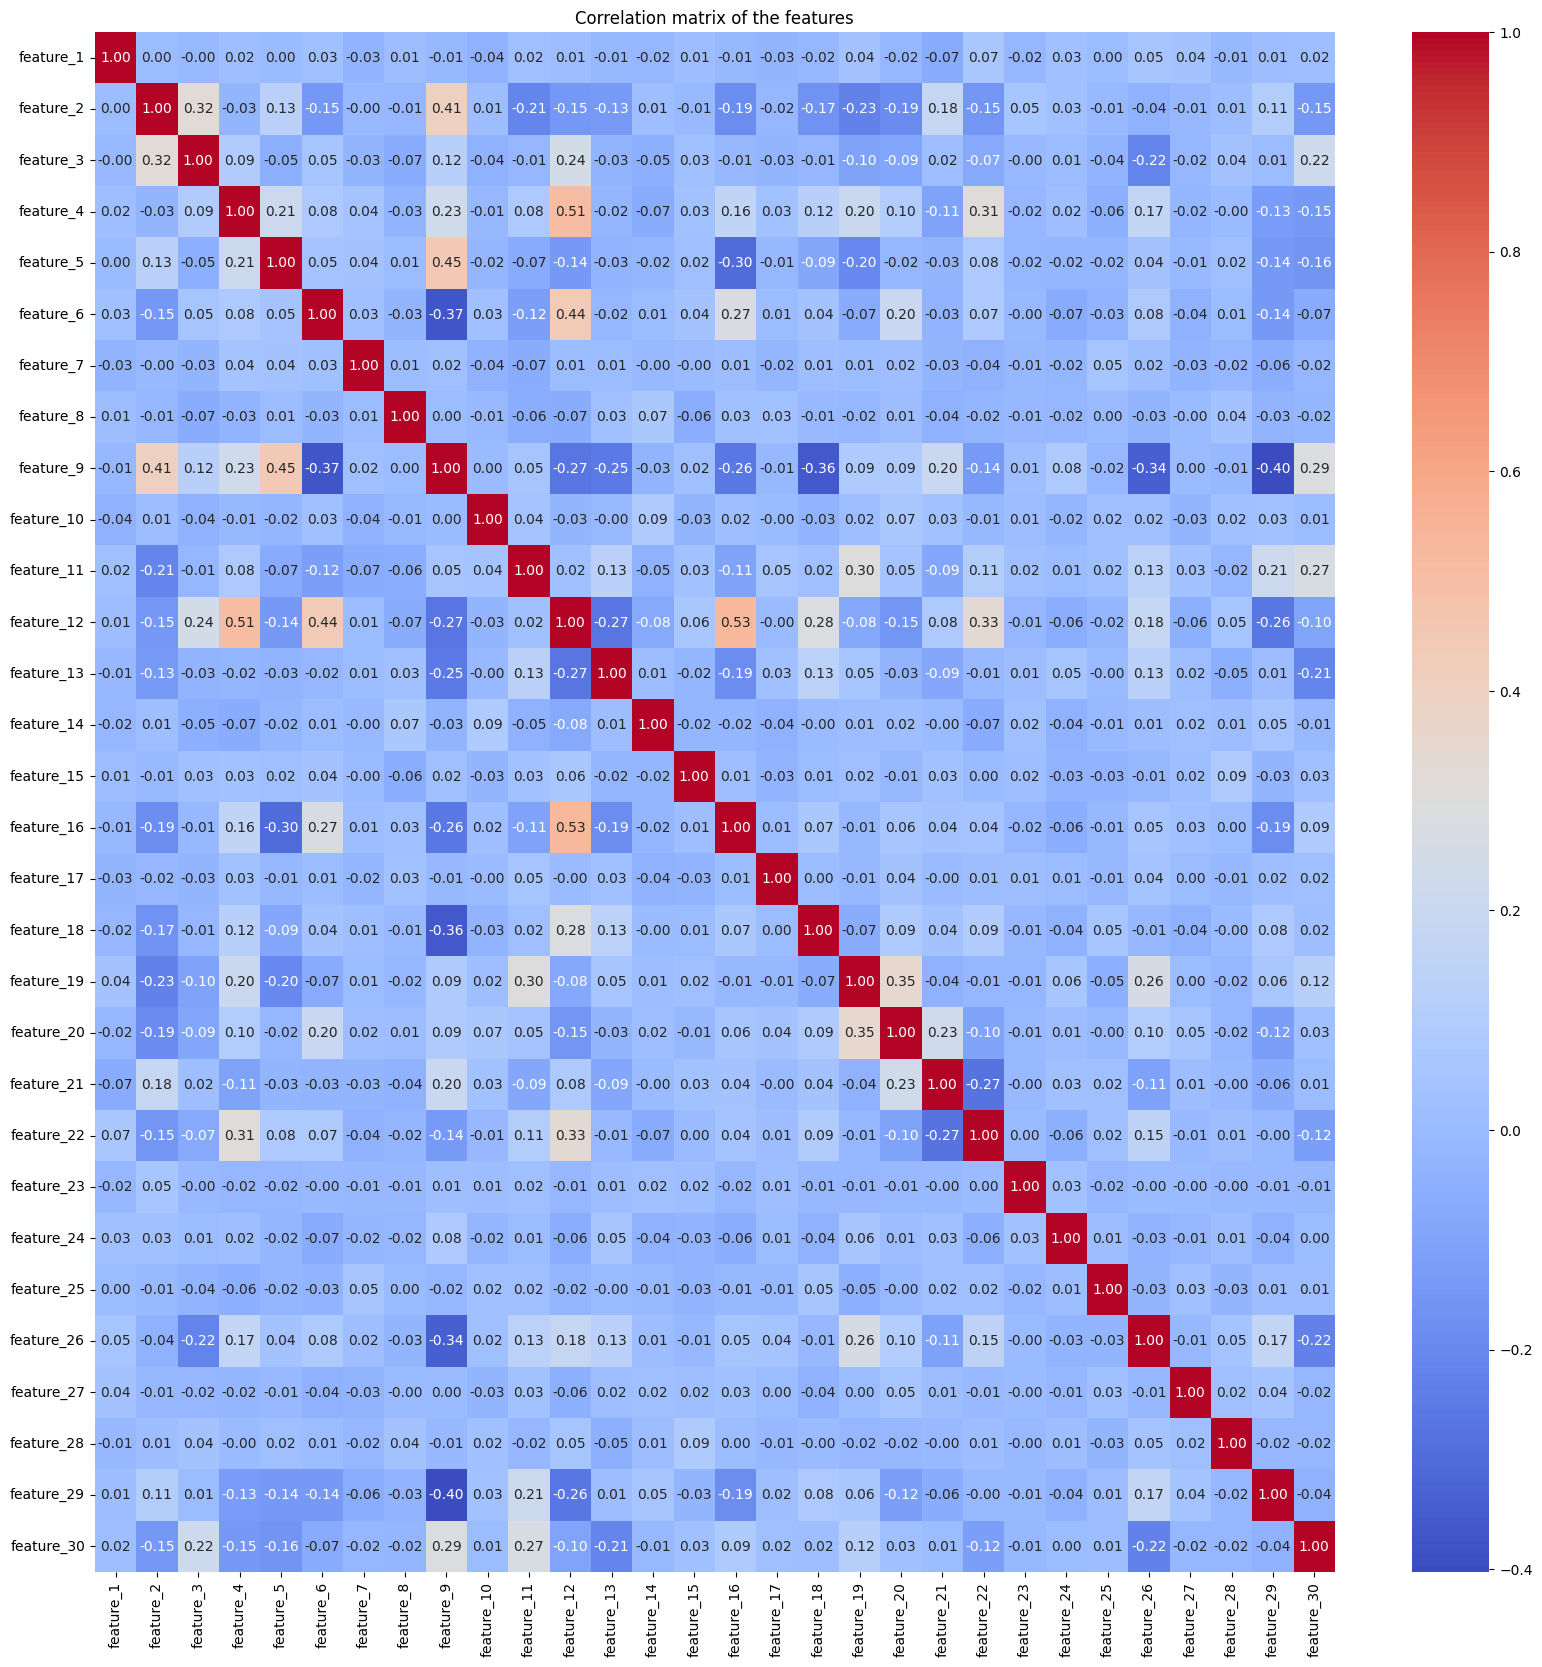

In [15]:
corr = df_features.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix of the features")
plt.show()

It is then evident that most of the features are not correlated or lowly correlated, which is good for the classification task.
Let us inspect outliers with first boxplots and then IQR method.

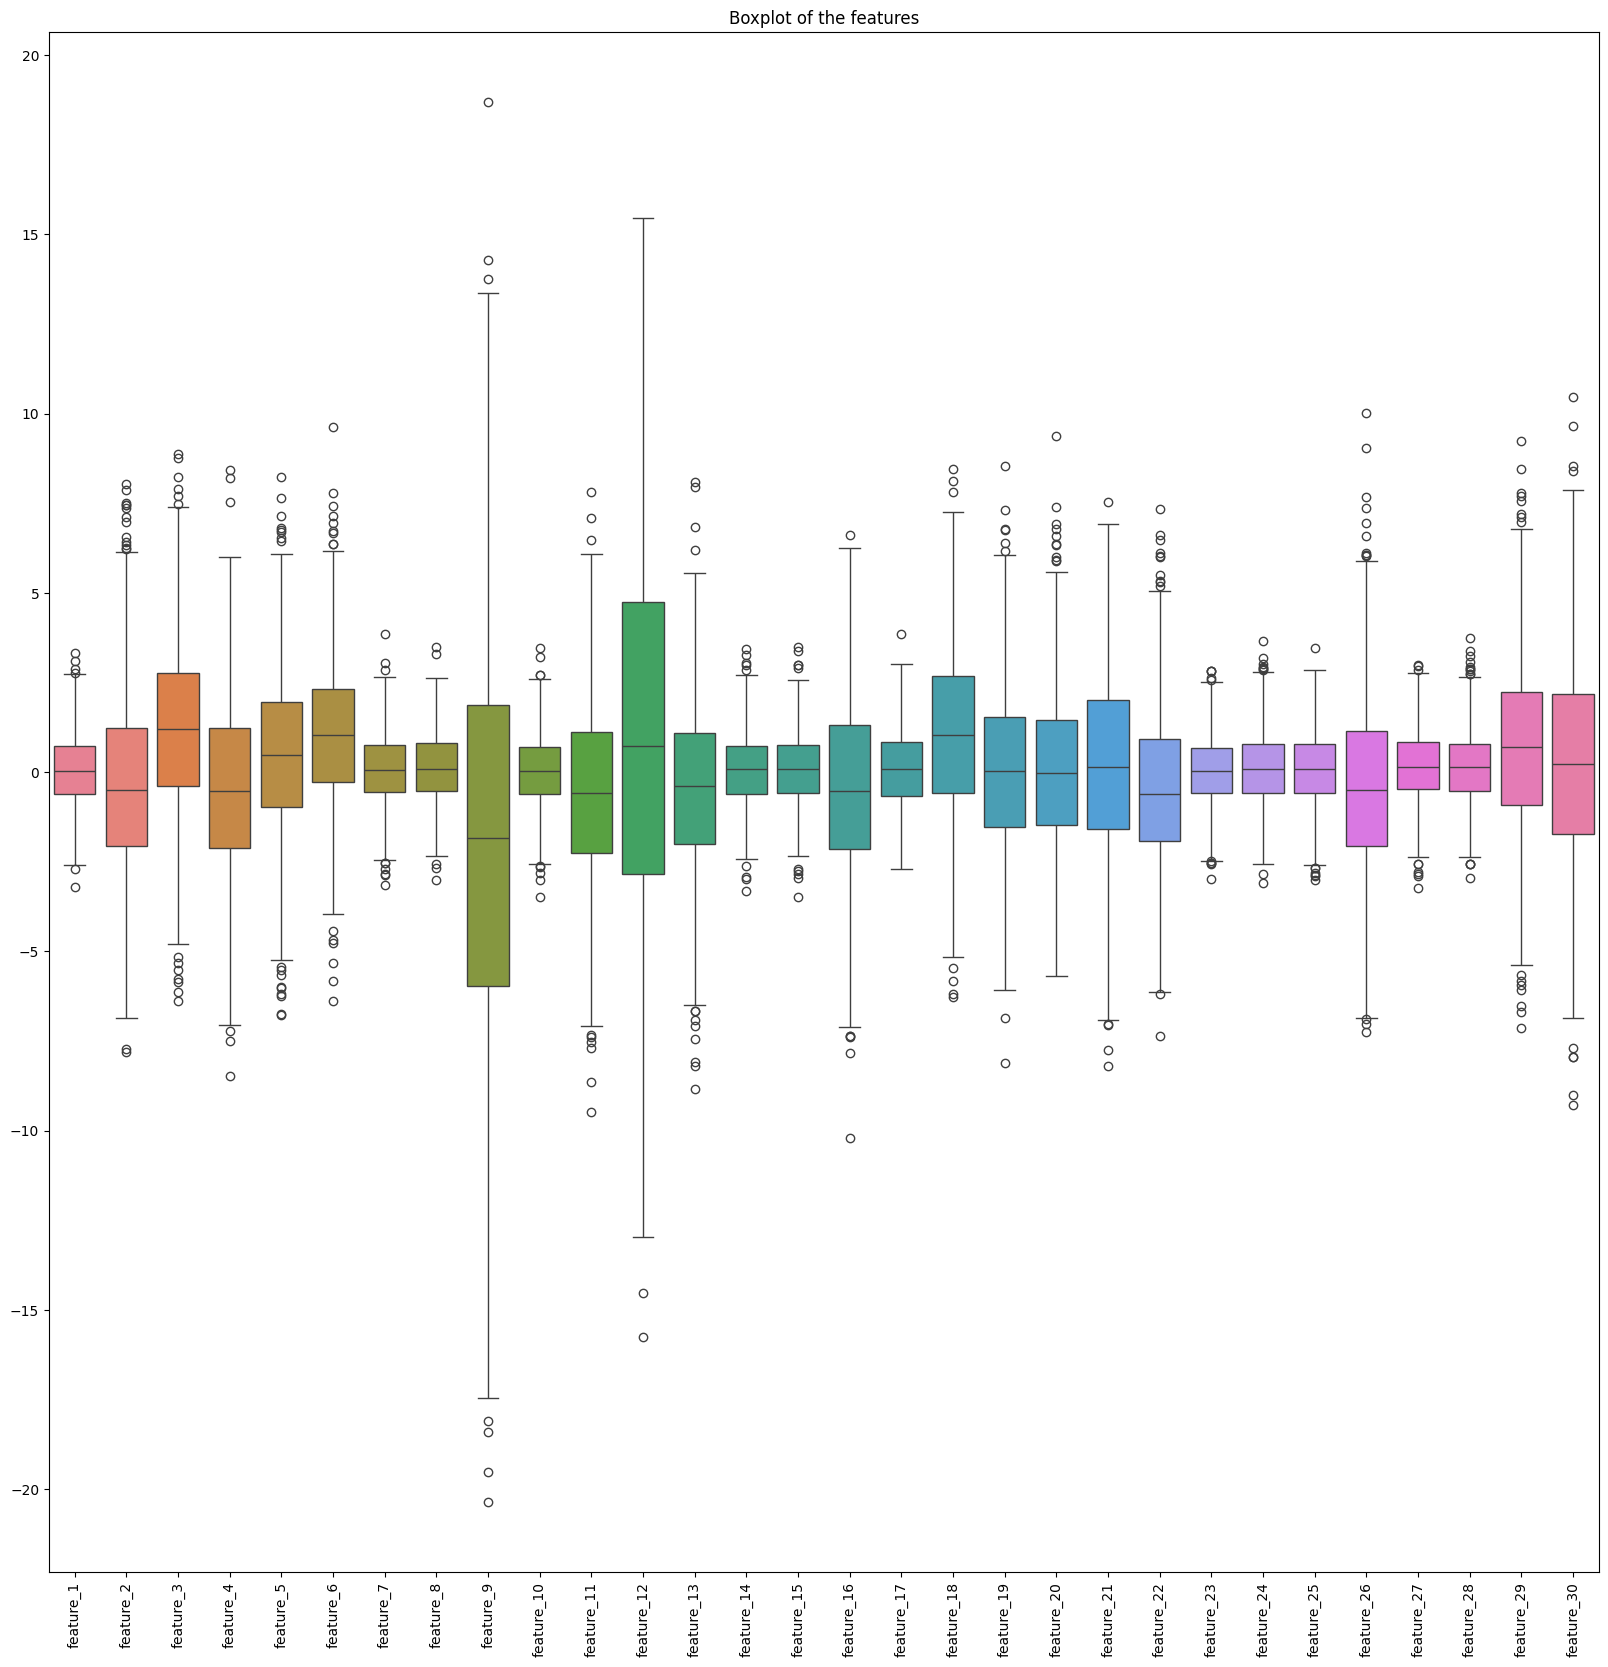

In [16]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df_features)
plt.xticks(rotation=90)
plt.title("Boxplot of the features")
plt.show()

As we already proved normality of most features, it is also clear from the boxplot the symmetry of the distributions. From a first look there are just a few outliers, as expected from the previous analysis of kurtosis and skewness, but let us see them better with the IQR proximity rule.

In [17]:
total_elements = df_features.shape[0] * df_features.shape[1]
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_features < (Q1 - 1.5 * IQR)) | (df_features > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("Outliers Percentage:","{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: feature_1      6
feature_2     15
feature_3     13
feature_4      6
feature_5     17
feature_6     15
feature_7      9
feature_8      5
feature_9      7
feature_10     9
feature_11     9
feature_12     2
feature_13    12
feature_14     9
feature_15    10
feature_16     6
feature_17     1
feature_18     7
feature_19     8
feature_20    10
feature_21     5
feature_22    12
feature_23    10
feature_24     9
feature_25     7
feature_26    13
feature_27     9
feature_28    14
feature_29    15
feature_30     9
dtype: int64
Outliers Percentage: 0.85%


Indeed, as expexted, just few datapoints are considered outliers for each features. A possible strategy is to remove them, but we will keep them for now considering the fact that the dataset is randomly generated. 

In real-world scenarios, extreme values are often part of the natural distribution and can provide valuable information about the underlying process, therefore giving lots of information for the classification task.


## Data visualization

Now that we have gain some insights about the dataset, let us proceed in visualizing the data. We will use PCA to reduce the dimensionality of the dataset and then plot the data in 3D and then try a different approach to achieve the same goal with UMAP.

We normalize the data before applying PCA and UMAP with usual z-score normalization given by standard scaler.

In [18]:
df_scaled = StandardScaler().fit_transform(df_features)
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

We now firsly visualize the necessary number of components in order to explain 95% variance of the dataset. We do it by plotting the explained variance against the number of component and we expect to reach a plateau after a certain number of components.

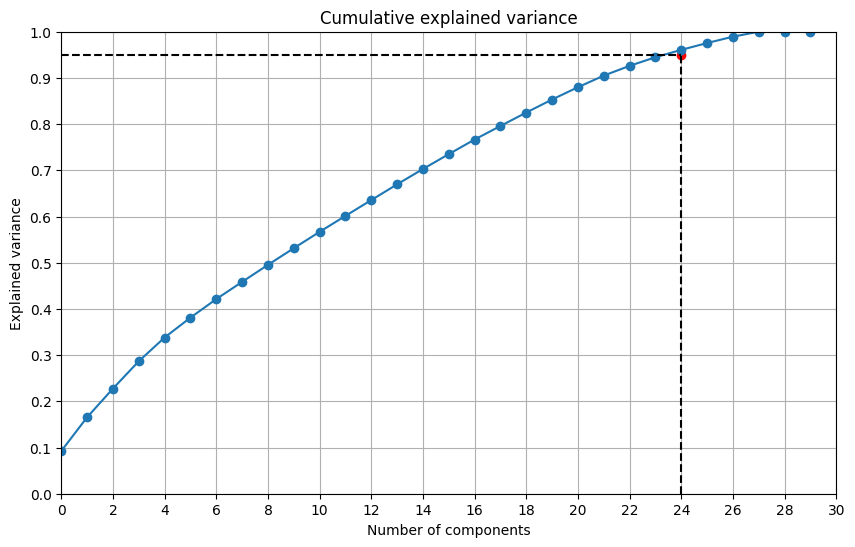

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_ticks = int(np.ceil(len(cumsum) / 2))

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))  
plt.plot(cumsum, marker='o')
plt.title("Cumulative explained variance")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.xticks(np.arange(0, len(cumsum) + 1, 2))  
plt.xlim(0, len(cumsum)) 
plt.ylim(0, 1)  
plt.yticks(np.arange(0, 1.1, 0.1))  
plt.grid(True)

nec_dimensions = np.argmax(cumsum >= 0.95)
# Plot the necessary dimensions
plt.scatter(nec_dimensions, 0.95, color='red')
plt.plot([nec_dimensions, nec_dimensions], [0, 0.95], linestyle='--', color='black')
plt.plot([0, nec_dimensions], [0.95, 0.95], linestyle='--', color='black')

plt.show()


Indeed, 24 components are necessary to explain 95% of the variance of the dataset and moreover we see the plateau after 27 component.

We now proceed in plotting the data in 3D with PCA, using of course the first 3 components.

In [20]:
df_pca_3d = pd.DataFrame(df_pca[:, :3], columns=["PC1", "PC2", "PC3"])
df_pca_3d["label"] = df["label"]
fig = px.scatter_3d(
    data_frame = df_pca_3d,
    x = "PC1",
    y = "PC2",
    z = "PC3",
    title="3-dimensional representation of the data with PCA",
    color = "label"
)
fig.show()

We see that just using the first 3 components of PCA, the data looks more or less separable with just few datapoints with slack. This means that a linear classifier (like the Logistic Regression) could be able to classify the data with good accuracy.

Now we try to tackle the same problem using UMAP (Uniform Manifold Approximation and Projection), which is a non-linear dimensionality reduction technique. Since with UMAP it is harder to estimate the explained variance, we heuristically choose the number of components that was enough to explain 95% of the variance in PCA. Moreover, we use 20 as the number of neighbors hyperparameter to try to capture global properties of the features rather than specific ones.

In [21]:
umap_model = umap.UMAP(n_components=3, n_neighbors=20)
df_umap = umap_model.fit_transform(df_scaled)

df_umap_3d = pd.DataFrame(df_umap, columns=["UMAP1", "UMAP2", "UMAP3"])
df_umap_3d["label"] = df["label"]
fig = px.scatter_3d(
    data_frame = df_umap_3d,
    x = "UMAP1",
    y = "UMAP2",
    z = "UMAP3",
    title="3-dimensional representation of the data with UMAP",
    color = "label"
)
fig.show()

Again, the plot resembles the one obtained with PCA, but we see that the data is more separable and the clusters are more defined, exluding few datapoints that are clearly not separable.

## Clustering

We now try to cluster the data using hierarchical clustering and KMeans. 

Firstly, we try hierarchical clustering with four different linkage methods, i.e. Ward, complete, average and median. What we expect is to have 2 clusters, as we know that there are 2 labels in the dataset. Also, since ward linkage is often considered one of the best hierarchical clustering methods we also expect it to perform better than the others.

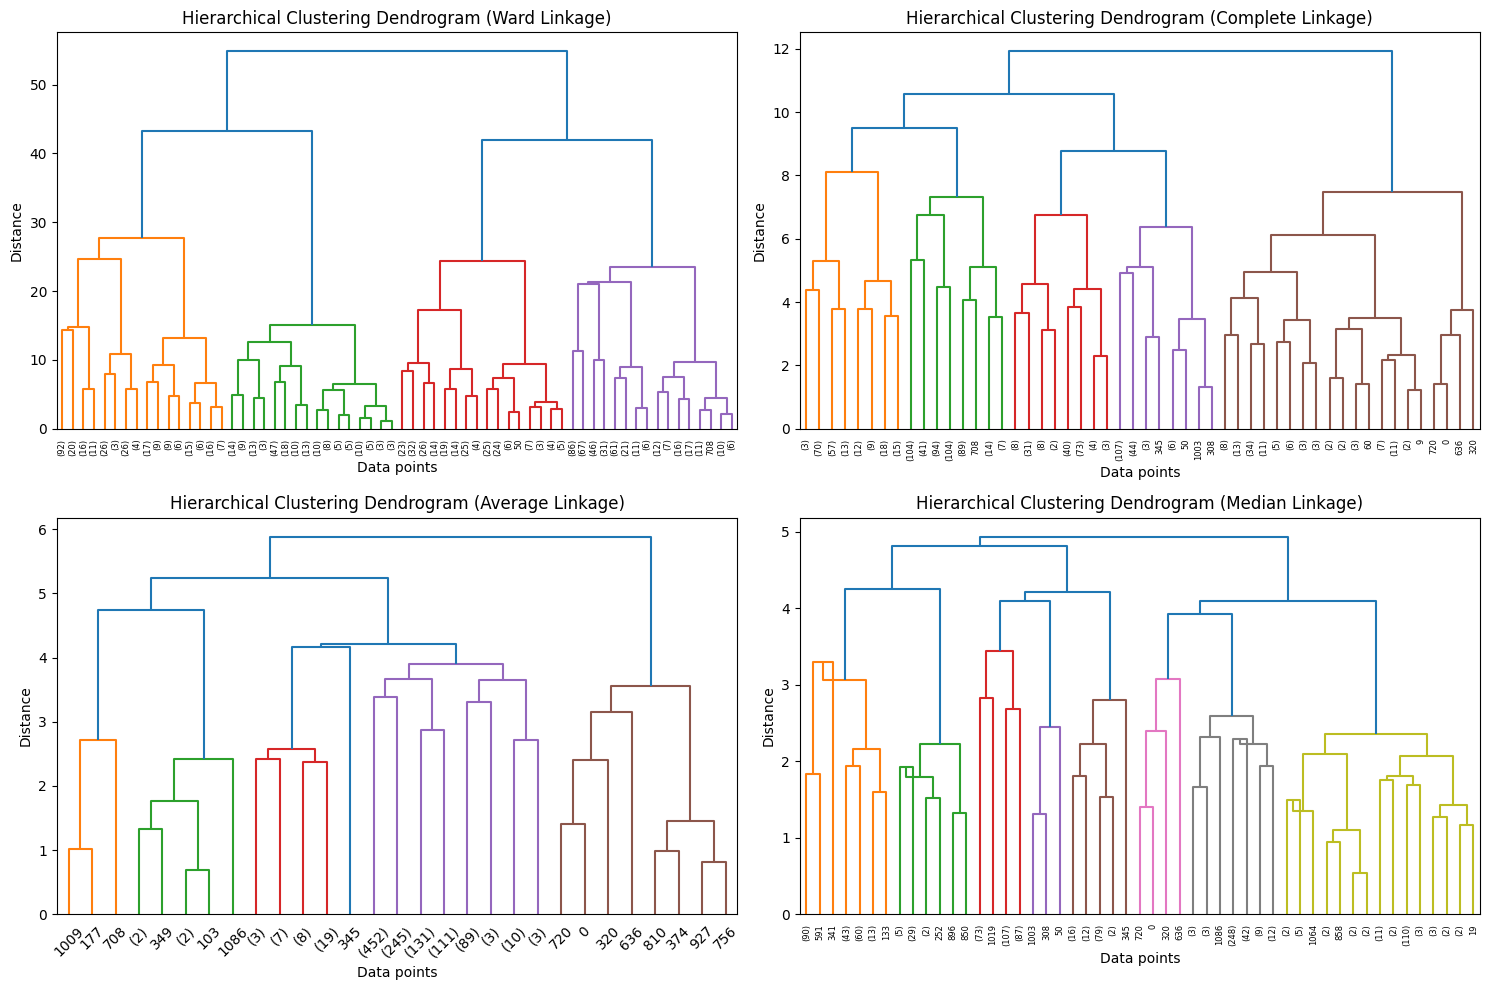

In [22]:
methods = ['ward', 'complete', 'average', 'median']

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    linked = linkage(pca_result, method=method)
    dendrogram(linked, distance_sort='descending', truncate_mode='level', p=5)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data points')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Indeed, we see that the dendrogram obtained with Ward linkage is the one that best separates the data in 2 clear clusters, as desired.

We now try KMeans with 2 clusters and we expect to have the same result as hierarchical clustering with Ward linkage. To do so, we set n_clusters=2 and we fit the model three times using different features combinations.

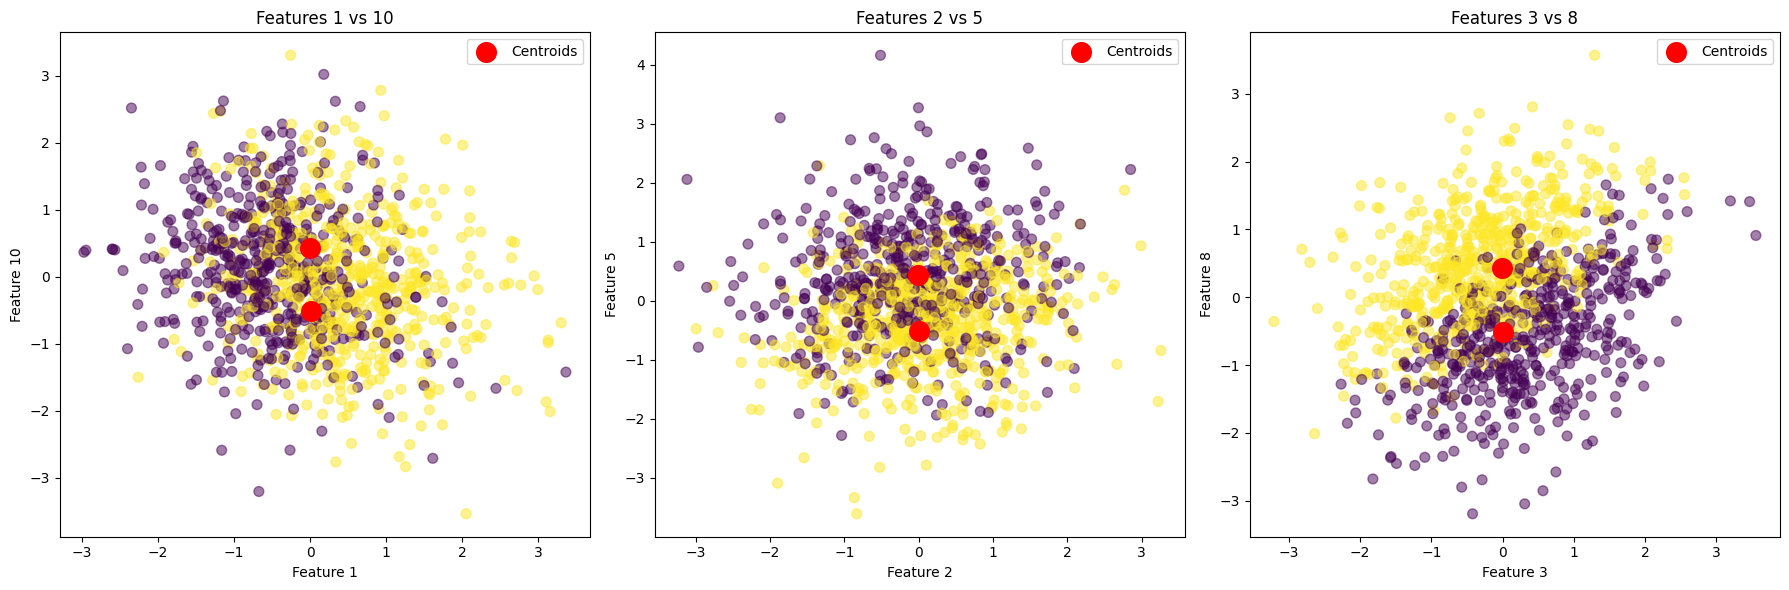

In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

# Randomly select 3 feature combinations
feature_combinations = [(1, 10), (2, 5), (3, 8)] 

# Plotting subplots for each feature combination
plt.figure(figsize=(18, 6))
for i, (feature1, feature2) in enumerate(feature_combinations, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df_scaled[:, feature1], df_scaled[:, feature2], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.title("Features {} vs {}".format(feature1, feature2))
    plt.xlabel("Feature {}".format(feature1))
    plt.ylabel("Feature {}".format(feature2))
    plt.legend()
plt.tight_layout()
plt.show()

We see that KMeans (with k=2) is nearly able to separate the data in 2 clusters, as desired. 

## Supervised Learning

Proportions in the train and test set will roughly match those in the original dataset.

In [24]:
labels = df["label"]
X_train, X_test, y_train, y_test = train_test_split(df_features, labels, test_size=0.2, random_state=42)

I quickly check the proportions of the labels in the train and test set, they should be consistent with the original dataset.

In [25]:
print("Proportions in y_train:", y_train.value_counts(normalize=True))
print("Proportions in y_test:", y_test.value_counts(normalize=True))

Proportions in y_train: label
0    0.522727
1    0.477273
Name: proportion, dtype: float64
Proportions in y_test: label
1    0.509091
0    0.490909
Name: proportion, dtype: float64


Indeed, the splitting coherently mantains the proportions of the labels seen in the original dataset. We can now proceed in training the models and tuning their hyperparameters.

### Logistic Regression

We first start with Logistic Regression and then proceed with Random Forest later.

In [26]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.8772727272727273


In [27]:
cv_score = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross validation scores:", cv_score)
print("Mean Cross validation score:", cv_score.mean())

Cross validation scores: [0.82954545 0.82954545 0.80681818 0.85227273 0.89772727]
Mean Cross validation score: 0.8431818181818181


In [28]:
param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.linspace(0.1, 1, 10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }

grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s[CV] END ................C=0.1, penalty=l1, so

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.2, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.2, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=0.2, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.2, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.2, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.2, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=0.2, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.2, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.2, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.2, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.2, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzin

[CV] END .....C=0.7000000000000001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.4, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.6, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=0.6, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.4, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=0.6, penalty=l2, solver=sag; total time=   0.0s
[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.4, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.7000000000000001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.7000000000000001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..................

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzin

[CV] END ................C=1.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=1.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=0.8, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.7000000000000001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.7000000000000001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.7000000000000001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.7000000000000001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.7000000000000001, penalty=elasticnet, solver=newton-cg; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=2)

In [29]:
print("Best parameters:", grid_search_logreg.best_params_)
print("Best score:", grid_search_logreg.best_score_)
print("Best estimator:", grid_search_logreg.best_estimator_)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.8579545454545455
Best estimator: LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')


In [30]:
logreg_best = grid_search_logreg.best_estimator_
y_pred = logreg_best.predict(X_test)
print("Accuracy of Logistic Regression after hyperparameter tuning:", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression after hyperparameter tuning: 0.8772727272727273


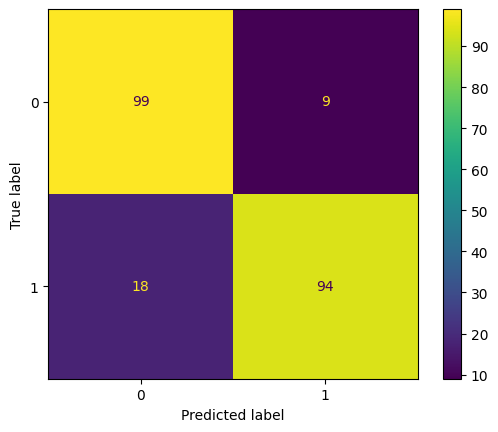

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [32]:
logreg_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", logreg_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       108
           1       0.91      0.84      0.87       112

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



Let's analyze the classification report carefully:
- accuracy: the proportion of the total number of correct predictions that were correct
- precision: ratio $\frac{tp}{tp+fp}$ calling $tp$ the number of true positives and $fp$ the number of false positives.
- recall (aka sensitivity): ratio $\frac{tp}{tp+fn}$ calling $tn$ the number of false negatives.
- f1-score: a harmonic mean of the precision and recall (best = 1, worst = 0), i.e. $2\frac{precision * recall}{precision + recall}$
- support: number of actual occurrences of each class in the target dataset. It represents the number of true instances in the test set that belong to that class.

Then also:
- macro avg: average of the performance measures (precision, recall, F1-score) calculated for each class without considering class imbalance so it gives equal weight to each class.
- weighted avg: average of the performance measures (precision, recall, F1-score) calculated for each class, weighted by the number of true instances for each class, hence it considers class imbalance by giving more weight to classes with more instances.

Now, in the case of Logistic Regression, we see:
- Class "0" has a precision of 0.85, recall of 0.92, and F1-score of 0.88; moreover, there are 108 instances of class "0" in the test set.
- Class "1" has a precision of 0.91, recall of 0.84, and F1-score of 0.87; also, there are 112 instances of class "1" in the test set.
- The overall accuracy of the model is 0.88.
- The macro average precision, recall, and F1-score are all 0.88.
- The weighted average precision, recall, and F1-score are all 0.88.

### Random Forest

We now try Random Forest, which is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees.

In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred))

Accuracy of Random Forest: 0.8863636363636364


In [34]:
cv_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross validation scores:", cv_score)
print("Mean Cross validation score:", cv_score.mean())

Cross validation scores: [0.86363636 0.86931818 0.86931818 0.875      0.94886364]
Mean Cross validation score: 0.8852272727272726


We first try to optimize one of the core parameters of the Random Forest algorithm: the number of trees in the forest. We will use a different heuristic approach to find it, to propose new methods. We plot the validation curve against the number of trees in the forest and see when the curve starts reaching a plateau. Then we will proceed in optimizing the other parameters with standard grid search.

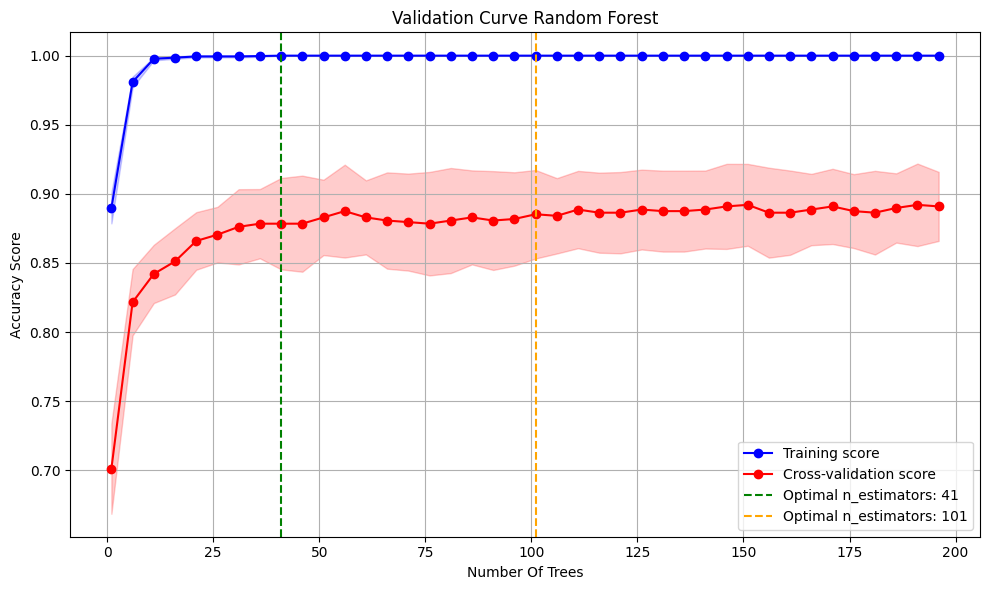

In [35]:
param_range = np.arange(1, 200, 5)
train_scores, test_scores = validation_curve(rf, X_train, y_train, param_name="n_estimators", 
                                             param_range=param_range, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Cross-validation score", color="red", marker='o')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

optimal_n_estimators = param_range[np.argmax(train_mean)]
plt.axvline(x=optimal_n_estimators, linestyle='--', color='green', label=f'Optimal n_estimators: {optimal_n_estimators}')
plt.axvline(x=101, linestyle='--', color='orange', label='Optimal n_estimators: 101')

plt.title("Validation Curve Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.grid(True)
plt.show()

Hence it is clear that the optimal number of trees is 101 for the cross validation scores, values above that simply do not improve the performance of the model substantially and so they are not worth the computational cost. Now we proceed in doing a grid search for the other remaining parameters.

In [40]:
param_grid = {
        'n_estimators': [101],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
        }

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [101]},
             scoring='accuracy', verbose=2)

In [41]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)
print("Best estimator:", grid_search_rf.best_estimator_)

Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 101}
Best score: 0.9011363636363636
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_split=5, n_estimators=101, random_state=42)


So according to the grid search, the best parameters for the Random Forest are:
*{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 101}*

We now use these parameters to train the model and evaluate it on the test set and plotting the confusion matrix.


In [42]:
# Use the best estimator from the grid search
rf_best = grid_search_rf.best_estimator_
y_pred = rf_best.predict(X_test)
print("Accuracy of Random Forest after hyperparameter tuning:", accuracy_score(y_test, y_pred))

Accuracy of Random Forest after hyperparameter tuning: 0.8727272727272727


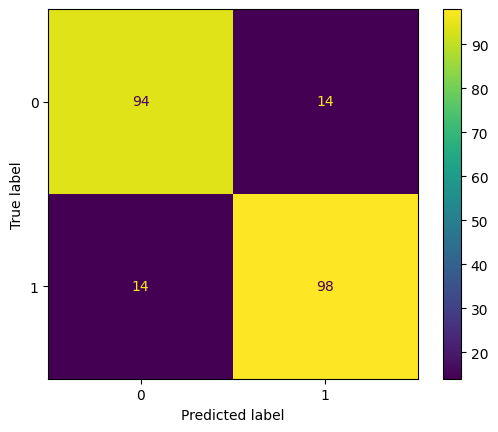

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

We noe see the same metrics described for the Logistic Regression model, but for the Random Forest.

In [ ]:
rf_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", rf_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       108
           1       0.88      0.88      0.88       112

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



Now, in the case of Logistic Regression, we see:
- Class "0" has a precision of 0.87, recall of 0.87, and F1-score of 0.87; moreover, there are 108 instances of class "0" in the test set.
- Class "1" has a precision of 0.88, recall of 0.88, and F1-score of 0.88; also, there are 112 instances of class "1" in the test set.
- The overall accuracy of the model is 0.87.
- The macro average precision, recall, and F1-score are all 0.87.
- The weighted average precision, recall, and F1-score are all 0.87.

What is also interesting to see in Random Forest is the feature importance and a plot of the trees.

We start by seeing feature importance and plot them.

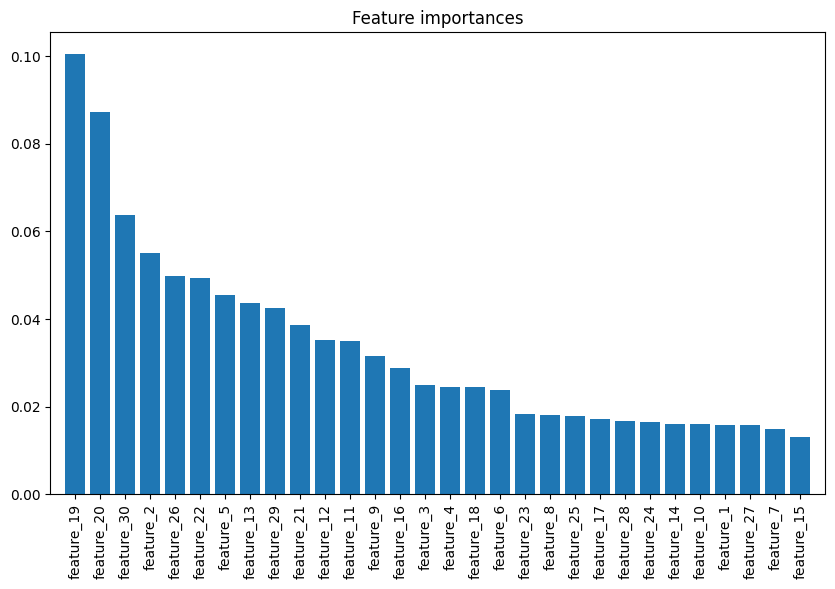

Feature importances:
             importance
feature_19    0.100467
feature_20    0.087240
feature_30    0.063642
feature_2     0.055161
feature_26    0.049741
feature_22    0.049301
feature_5     0.045586
feature_13    0.043634
feature_29    0.042575
feature_21    0.038565
feature_12    0.035099
feature_11    0.034935
feature_9     0.031476
feature_16    0.028771
feature_3     0.024981
feature_4     0.024495
feature_18    0.024468
feature_6     0.023745
feature_23    0.018345
feature_8     0.018101
feature_25    0.017903
feature_17    0.017134
feature_28    0.016614
feature_24    0.016506
feature_14    0.016004
feature_10    0.015996
feature_1     0.015892
feature_27    0.015803
feature_7     0.014866
feature_15    0.012952
Sum of feature importances: importance    1.0
dtype: float64


In [ ]:
# Plot the feature importances
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
# plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature importances:\n", feature_importances)
# check that sums to 1
print("Sum of feature importances:", feature_importances.sum())

Since feature importances sum up to 1, it is clear that feature_19 is the most influencial (importance at 10%).

Let's visualize one of the trees, just for illustration purposes.

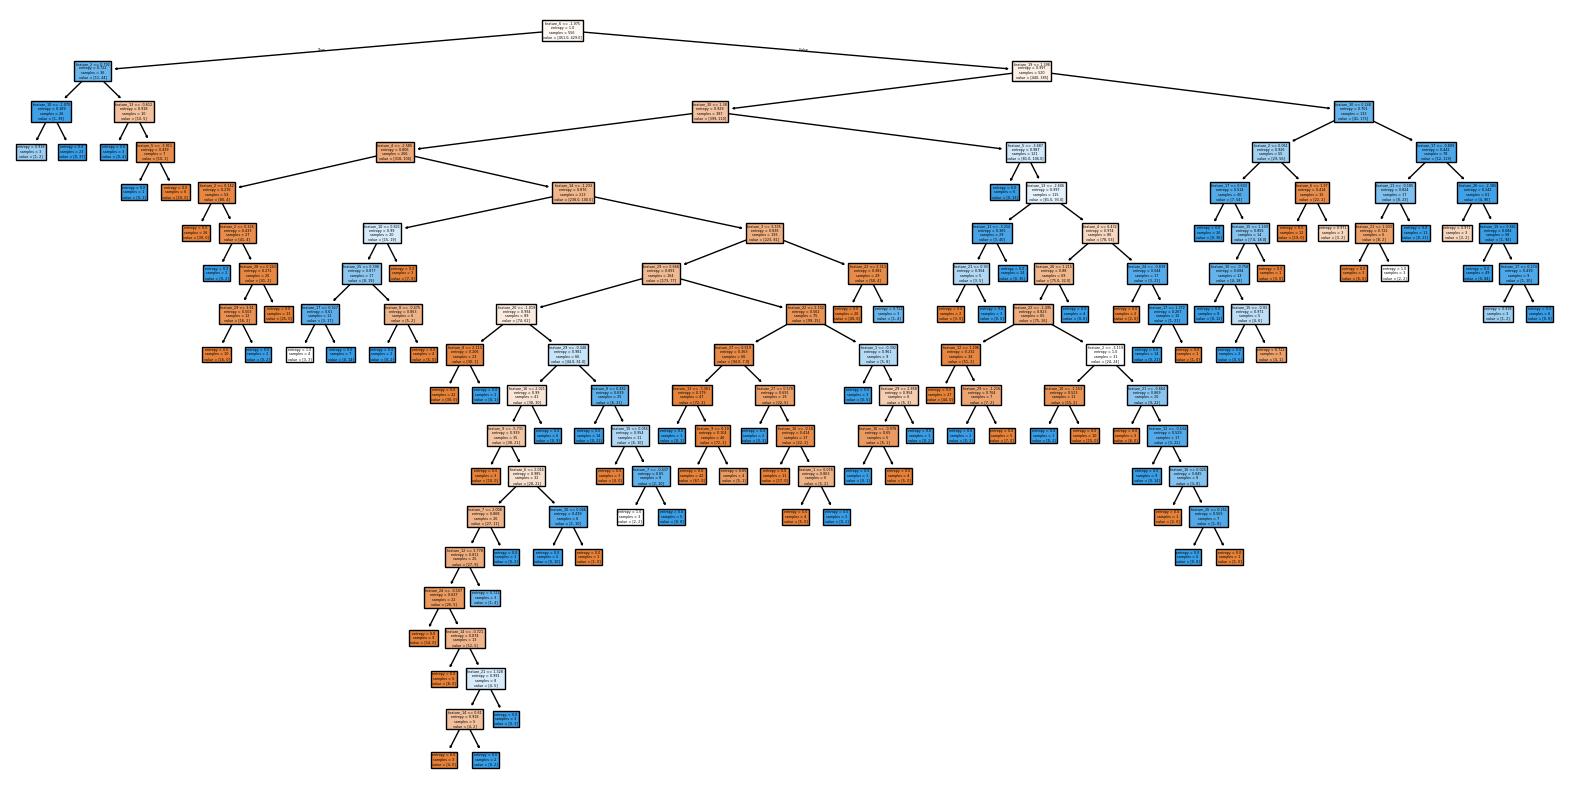

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rf_best.estimators_[0], feature_names=df_features.columns, filled=True)
plt.show()

## Model Selection

Now we consider both Logistic Regression and Random Forest with their optimal parameters found in the previous section and compare them in order to choose the best model for this dataset.

In [ ]:
rf_scores = cross_val_score(rf_best, X_train, y_train, cv=5)
logreg_scores = cross_val_score(logreg_best, X_train, y_train, cv=5)

Before comparing metrics of the two, let us test if the cross validation scores are statistically different. We will use a t-test for this purpose.

In this context, we have:
- $H_0$ Null Hypothesis: there is no difference in performance between the two models 
- $H_1$ Alternative Hypothesis: there is a significant difference in performance between the two models

In [ ]:
# Perform t-test
t_statistic, p_value = ttest_ind(logreg_scores, rf_scores)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("The difference in performance between LogReg and RF is statistically significant.")
else:
    print("The difference in performance between LogReg and RF is not statistically significant.")


t-statistic: -1.8293348017565605
p-value: 0.10474380121676623
The difference in performance between LogReg and RF is not statistically significant.


Therefore, we do not have enough evidence to reject the null hypothesis. In other words, there is not sufficient statistical evidence to conclude that there is a significant difference in performance between logistic regression and random forest models based on the provided cross-validation scores, so the difference in the two is slight as expected.

We then compare all the metrics of the best models collected.

In [ ]:
# create a table of the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, logreg_best.predict(X_test)), accuracy_score(y_test, rf_best.predict(X_test))],
    'Precision': [precision_score(y_test, logreg_best.predict(X_test)), precision_score(y_test, rf_best.predict(X_test))],
    'Recall': [recall_score(y_test, logreg_best.predict(X_test)), recall_score(y_test, rf_best.predict(X_test))],
    'F1 Score': [f1_score(y_test, logreg_best.predict(X_test)), f1_score(y_test, rf_best.predict(X_test))],
    'ROC AUC': [roc_auc_score(y_test, logreg_best.predict(X_test)), roc_auc_score(y_test, rf_best.predict(X_test))],
    'Cross Validation Score': [logreg_scores.mean(), rf_scores.mean()],
})
results


Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.877273   0.912621  0.839286  0.874419  0.877976   
1        Random Forest  0.872727   0.875000  0.875000  0.875000  0.872685   

   Cross Validation Score  
0                0.857955  
1                0.901136

Let's deeply analyze the results:
- Accuracy: both models are nearly the same.
- Precision: Logistic Regression has a slightly higher precision of 0.9126 compared to Random Forest's precision of 0.8750.
- Recall: Random Forest has a slightly higher recall of 0.8750 compared to Logistic Regression's recall.
- F1-score, ROC AUC: again, both models are nearly the same.
- Cross Validation Scores: Random Forest wins here with 0.9011 compared to Logistic Regression's 0.8579.

Hence, it is clear that our decision will be based on precision and recall, given that the other metrics are pretty similar. Let's inspect Precision-Recall Curve, that illustrates the trade-off between precision and recall for different threshold values.

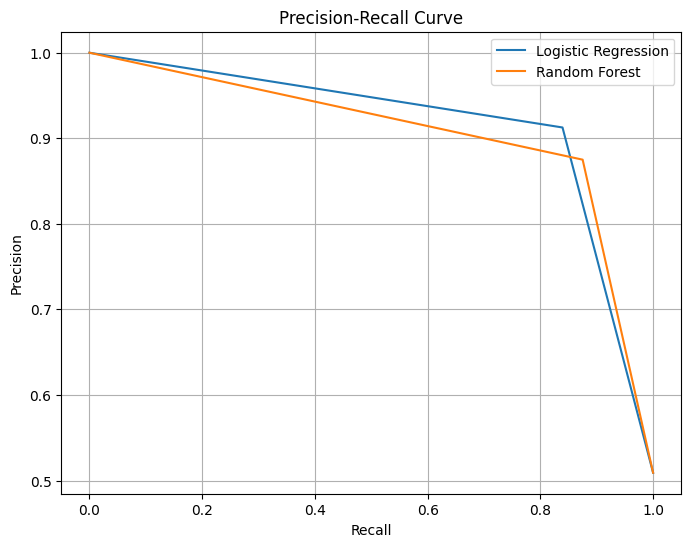

In [ ]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg_best.predict(X_test))
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_best.predict(X_test))

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

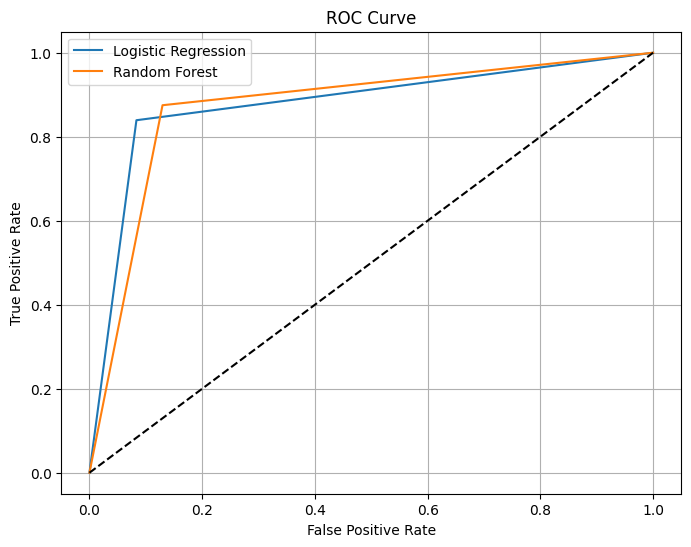

In [ ]:
# roc curve
from sklearn.metrics import roc_curve

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_best.predict(X_test))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_best.predict(X_test))

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## *Bonus*: MLP and Ensemble Learning

We will now try to use a more involved architecture, i.e. MultiLayer Perceptron. We will use the same procedure as before to optimize the parameters and then compare the results with the previous models. Additionally, we will try to use ensemble learning to combine the models and see if we can improve the performance.

In [ ]:
# Multilayer Perceptron Classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of MLP:", accuracy_score(y_test, y_pred))

Accuracy of MLP: 0.95


In [ ]:
# cross validation
cv_score = cross_val_score(mlp, X_train, y_train, cv=5)
print("Cross validation scores:", cv_score)
print("Mean Cross validation score:", cv_score.mean())

Cross validation scores: [0.9375     0.93181818 0.90909091 0.93181818 0.95454545]
Mean Cross validation score: 0.9329545454545454


We already see that croos validation scores are higher than the previous models, so we can expect a better performance.

In [ ]:
# Tuning hyperparameters
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (50, 50, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# random search
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_s

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total tim

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.1s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total 

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total ti

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lb

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, 

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lb

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learni

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.5s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=lbfgs; total time=   0.2s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=ad

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total t

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.0s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=  

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; tot

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=ada

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=ada

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.6s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; 

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), lea

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.8s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; 

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invsca

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total t

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=adam; total time=   0.5s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sg

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solve

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total tim

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=ada

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscal

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=a

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(100,), (50, 50),
                                                               (100, 100),
                                                               (50, 50, 50)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   verbose=2)

In [ ]:
# best parameters
print("Best parameters:", random_search_mlp.best_params_)
print("Best score:", random_search_mlp.best_score_)
print("Best estimator:", random_search_mlp.best_estimator_)
y_pred = random_search_mlp.best_estimator_.predict(X_test)
print("Accuracy of MLP after hyperparameter tuning:", accuracy_score(y_test, y_pred))

Best parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'}
Best score: 0.9386363636363637
Best estimator: MLPClassifier(alpha=0.05, learning_rate='adaptive', random_state=42)
Accuracy of MLP after hyperparameter tuning: 0.9545454545454546


And, indeed, we clearly see the difference in accuracy with respect to RF and LogReg. Just to play a bit, we also try to use ensemble learning to combine the models and see if we can improve the performance, we will use as voting classifier the three models we have trained so far with soft voting. Soft predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [ ]:
mlp_best = random_search_mlp.best_estimator_
# ensemble learning
# Create a dictionary of the models
estimators = [('logistic', logreg_best), ('random_forest', rf_best), ('mlp', mlp_best)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print("Accuracy of Ensemble Learning:", accuracy_score(y_test, y_pred))

Accuracy of Ensemble Learning: 0.9454545454545454


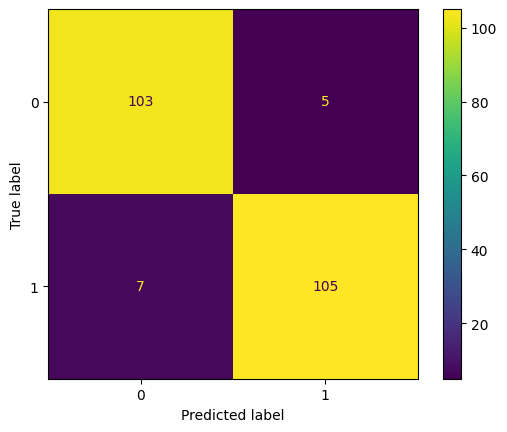

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
ensemble_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", ensemble_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.95      0.94      0.95       112

    accuracy                           0.95       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220



We see very good results, higher in every metric compared to the previous models. This is expected since ensemble learning is a powerful technique that can improve the performance of the models and moreover since MLP performed much better than the two.

## Conclusions

We will now conclude the project by predicting the labels of the test set using the best model found so far. We will stick to the two RF and LogReg for the purpose of the project, although we have seen that a better model was found with MLP and ensemble learning.

So we will select as the best:
*Random Forest* with the following parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 101}

In [ ]:
df_test = pd.read_csv('/Users/filipporonzino/mathematical-modelling-in-ml/mathematical-modelling-in-ml/data/mldata_0003191788.TEST_FEATURES.csv')
df_test

id  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        0  -0.315459  -0.776339  -0.836547  -1.320031   0.795264   1.491778   
1        1   0.405655   1.500583   3.392454  -3.713409   2.492754   0.126690   
2        2  -0.683450   1.951931   3.331664  -1.474665   2.347903  -0.814971   
3        3  -0.529395  -0.157790  -2.035078   0.630387   3.779690   1.602012   
4        4  -0.135899  -1.191181  -4.519660  -0.438170  -2.160791   0.944793   
...    ...        ...        ...        ...        ...        ...        ...   
1095  1095   1.763603   1.167421  -1.421526  -0.568748  -0.198831   1.643797   
1096  1096  -0.048411   1.159299   1.550699  -1.468924  -0.534662   1.510456   
1097  1097   0.946721   0.304183  -2.129049  -1.584658   1.602932   4.580941   
1098  1098  -0.069135  -0.114367  -1.453001  -0.182576   4.392517  -1.345238   
1099  1099  -1.655765  -4.415215  -2.311851  -2.348225   0.121399   0.731043   

      feature_7  feature_8  feature_9  ...  feature_21  feature_22  \
0      0.423093   1.456819  -6.876312  ...   -1.396486    1.418558   
1     -0.625819   1.114851  -3.047271  ...   -6.385369    0.701525   
2      0.701708   0.196501  -6.253296  ...   -3.057858    0.846614   
3      0.570142  -0.793449  -0.856309  ...    4.495554    1.035384   
4     -2.022687  -0.930974  -7.454855  ...   -5.537667    1.622515   
...         ...        ...        ...  ...         ...         ...   
1095   0.480108  -0.942044 -11.809102  ...   -0.687326   -0.548861   
1096   0.120736   1.222152 -10.139229  ...    2.325146   -0.549804   
1097  -0.012618  -0.393249  -4.138821  ...   -3.092939    2.107195   
1098  -0.934285   0.315561   6.039335  ...   -1.459049    1.517751   
1099   0.088690  -0.831220  -7.470411  ...   -0.605858   -0.743747   

      feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0      -1.122844   -0.628660   -2.077016   -1.385293    0.957736    2.729164   
1       1.415482    1.668550   -1.306679   -1.355484    0.553722    0.949889   
2      -1.658903   -0.543151    1.685861   -0.455896    0.241656   -1.403650   
3       1.229776    2.374507    0.491934    2.712868   -0.250966   -0.637751   
4      -0.873188    1.079660   -1.369056    0.984224    0.500829   -0.717431   
...          ...         ...         ...         ...         ...         ...   
1095   -0.703878   -1.778110    0.490710    7.733287   -1.409547    0.465880   
1096   -0.573947    0.314219   -0.354556    3.642693    0.057608    0.437704   
1097    0.270600    1.579615    0.787711    4.000439    0.597611   -0.818000   
1098   -0.341328   -0.893379   -1.835403    0.336710    1.290149    0.421564   
1099    0.637378   -0.061225   -0.161317   -1.432004   -0.088861   -0.263025   

      feature_29  feature_30  
0       2.210495   -0.101082  
1      -1.836592   -3.340402  
2       0.830536   -3.408706  
3      -0.053156   -3.012957  
4       0.965411   -3.484862  
...          ...         ...  
1095    4.362937   -3.062967  
1096    0.426880   -2.313463  
1097   -0.789771    0.754416  
1098   -0.631143   -0.222597  
1099    2.121341   -0.121377  

[1100 rows x 31 columns]

In [ ]:
df_test = df_test.drop('id', axis=1)
df_test

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     -0.315459  -0.776339  -0.836547  -1.320031   0.795264   1.491778   
1      0.405655   1.500583   3.392454  -3.713409   2.492754   0.126690   
2     -0.683450   1.951931   3.331664  -1.474665   2.347903  -0.814971   
3     -0.529395  -0.157790  -2.035078   0.630387   3.779690   1.602012   
4     -0.135899  -1.191181  -4.519660  -0.438170  -2.160791   0.944793   
...         ...        ...        ...        ...        ...        ...   
1095   1.763603   1.167421  -1.421526  -0.568748  -0.198831   1.643797   
1096  -0.048411   1.159299   1.550699  -1.468924  -0.534662   1.510456   
1097   0.946721   0.304183  -2.129049  -1.584658   1.602932   4.580941   
1098  -0.069135  -0.114367  -1.453001  -0.182576   4.392517  -1.345238   
1099  -1.655765  -4.415215  -2.311851  -2.348225   0.121399   0.731043   

      feature_7  feature_8  feature_9  feature_10  ...  feature_21  \
0      0.423093   1.456819  -6.876312    1.632074  ...   -1.396486   
1     -0.625819   1.114851  -3.047271    0.382668  ...   -6.385369   
2      0.701708   0.196501  -6.253296   -0.406459  ...   -3.057858   
3      0.570142  -0.793449  -0.856309    0.548526  ...    4.495554   
4     -2.022687  -0.930974  -7.454855   -0.376359  ...   -5.537667   
...         ...        ...        ...         ...  ...         ...   
1095   0.480108  -0.942044 -11.809102   -1.521821  ...   -0.687326   
1096   0.120736   1.222152 -10.139229    0.654201  ...    2.325146   
1097  -0.012618  -0.393249  -4.138821    1.036719  ...   -3.092939   
1098  -0.934285   0.315561   6.039335    0.278439  ...   -1.459049   
1099   0.088690  -0.831220  -7.470411   -0.712124  ...   -0.605858   

      feature_22  feature_23  feature_24  feature_25  feature_26  feature_27  \
0       1.418558   -1.122844   -0.628660   -2.077016   -1.385293    0.957736   
1       0.701525    1.415482    1.668550   -1.306679   -1.355484    0.553722   
2       0.846614   -1.658903   -0.543151    1.685861   -0.455896    0.241656   
3       1.035384    1.229776    2.374507    0.491934    2.712868   -0.250966   
4       1.622515   -0.873188    1.079660   -1.369056    0.984224    0.500829   
...          ...         ...         ...         ...         ...         ...   
1095   -0.548861   -0.703878   -1.778110    0.490710    7.733287   -1.409547   
1096   -0.549804   -0.573947    0.314219   -0.354556    3.642693    0.057608   
1097    2.107195    0.270600    1.579615    0.787711    4.000439    0.597611   
1098    1.517751   -0.341328   -0.893379   -1.835403    0.336710    1.290149   
1099   -0.743747    0.637378   -0.061225   -0.161317   -1.432004   -0.088861   

      feature_28  feature_29  feature_30  
0       2.729164    2.210495   -0.101082  
1       0.949889   -1.836592   -3.340402  
2      -1.403650    0.830536   -3.408706  
3      -0.637751   -0.053156   -3.012957  
4      -0.717431    0.965411   -3.484862  
...          ...         ...         ...  
1095    0.465880    4.362937   -3.062967  
1096    0.437704    0.426880   -2.313463  
1097   -0.818000   -0.789771    0.754416  
1098    0.421564   -0.631143   -0.222597  
1099   -0.263025    2.121341   -0.121377  

[1100 rows x 30 columns]

In [ ]:
best_model = 
model.fit(X_train, y_train)
predictions = model.predict(df_test)

In [ ]:
print(predictions)
print(len(predictions))
print(np.unique(predictions))

In [ ]:
np.savetxt('/Users/filipporonzino/mathematical-modelling-in-ml/mathematical-modelling-in-ml/data/predictions', predictions, fmt="%d")